In [52]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [55]:
Base.classes.keys()

['measurement', 'station']

## D1: Determine the Summary Statistics for June

In [56]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

#stations=engine.execute('SELECT * FROM Station')
#measurement=engine.execute('SELECT * FROM Measurement')

june_temp = engine.execute('SELECT tobs, date FROM Measurement WHERE date like "%-06-%"')
#precipitation = engine.execute('SELECT prcp FROM Measurement WHERE date like "%-06-%"')

#elevation = engine.execute('SELECT Station.elevation FROM Station INNER JOIN Measurement ON Station.station = Measurement.station WHERE Measurement.date like "%-06-%"')

In [57]:
# Get column names
#print(stations.keys())
#print(measurement.keys())
print(june_temp.keys())

['tobs', 'date']


In [58]:
# Check data table 
june_result = june_temp.fetchall()
june_result

[(78.0, '2010-06-01'),
 (76.0, '2010-06-02'),
 (78.0, '2010-06-03'),
 (76.0, '2010-06-04'),
 (77.0, '2010-06-05'),
 (78.0, '2010-06-06'),
 (77.0, '2010-06-07'),
 (78.0, '2010-06-08'),
 (78.0, '2010-06-09'),
 (79.0, '2010-06-10'),
 (78.0, '2010-06-11'),
 (78.0, '2010-06-12'),
 (78.0, '2010-06-13'),
 (77.0, '2010-06-14'),
 (78.0, '2010-06-15'),
 (78.0, '2010-06-16'),
 (77.0, '2010-06-17'),
 (77.0, '2010-06-18'),
 (82.0, '2010-06-19'),
 (78.0, '2010-06-20'),
 (78.0, '2010-06-21'),
 (78.0, '2010-06-22'),
 (78.0, '2010-06-23'),
 (78.0, '2010-06-24'),
 (77.0, '2010-06-25'),
 (76.0, '2010-06-26'),
 (78.0, '2010-06-27'),
 (78.0, '2010-06-28'),
 (78.0, '2010-06-29'),
 (78.0, '2010-06-30'),
 (77.0, '2011-06-01'),
 (78.0, '2011-06-02'),
 (73.0, '2011-06-03'),
 (70.0, '2011-06-04'),
 (76.0, '2011-06-05'),
 (77.0, '2011-06-06'),
 (77.0, '2011-06-07'),
 (77.0, '2011-06-08'),
 (77.0, '2011-06-09'),
 (78.0, '2011-06-10'),
 (77.0, '2011-06-11'),
 (77.0, '2011-06-12'),
 (78.0, '2011-06-13'),
 (78.0, '20

In [59]:
#  3. Convert the June temperatures to a list.
june_final_result = [list(i) for i in june_result]
june_final_result

[[78.0, '2010-06-01'],
 [76.0, '2010-06-02'],
 [78.0, '2010-06-03'],
 [76.0, '2010-06-04'],
 [77.0, '2010-06-05'],
 [78.0, '2010-06-06'],
 [77.0, '2010-06-07'],
 [78.0, '2010-06-08'],
 [78.0, '2010-06-09'],
 [79.0, '2010-06-10'],
 [78.0, '2010-06-11'],
 [78.0, '2010-06-12'],
 [78.0, '2010-06-13'],
 [77.0, '2010-06-14'],
 [78.0, '2010-06-15'],
 [78.0, '2010-06-16'],
 [77.0, '2010-06-17'],
 [77.0, '2010-06-18'],
 [82.0, '2010-06-19'],
 [78.0, '2010-06-20'],
 [78.0, '2010-06-21'],
 [78.0, '2010-06-22'],
 [78.0, '2010-06-23'],
 [78.0, '2010-06-24'],
 [77.0, '2010-06-25'],
 [76.0, '2010-06-26'],
 [78.0, '2010-06-27'],
 [78.0, '2010-06-28'],
 [78.0, '2010-06-29'],
 [78.0, '2010-06-30'],
 [77.0, '2011-06-01'],
 [78.0, '2011-06-02'],
 [73.0, '2011-06-03'],
 [70.0, '2011-06-04'],
 [76.0, '2011-06-05'],
 [77.0, '2011-06-06'],
 [77.0, '2011-06-07'],
 [77.0, '2011-06-08'],
 [77.0, '2011-06-09'],
 [78.0, '2011-06-10'],
 [77.0, '2011-06-11'],
 [77.0, '2011-06-12'],
 [78.0, '2011-06-13'],
 [78.0, '20

In [60]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_final_result)
june_temp_df.head(10)

,0,1
0,78.0,2010-06-01
1,76.0,2010-06-02
2,78.0,2010-06-03
3,76.0,2010-06-04
4,77.0,2010-06-05
5,78.0,2010-06-06
6,77.0,2010-06-07
7,78.0,2010-06-08
8,78.0,2010-06-09
9,79.0,2010-06-10


In [61]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df = june_temp_df.rename(columns={0:"June_Temps", 1:"Date"})
june_temp_df.describe()

,June_Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


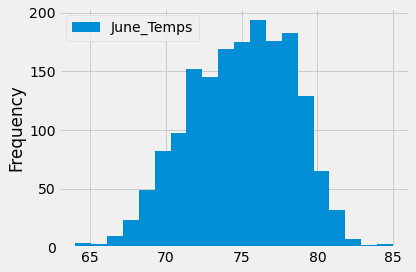

In [69]:
june = pd.DataFrame(june_temp_df, columns=['June_Temps'])
june.head()

june.plot.hist(bins=20)
# Compress x-axis
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [63]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

dec_temp = engine.execute('SELECT date, tobs FROM Measurement WHERE date like "%-12-%"')

In [64]:
# 7. Convert the December temperatures to a list.
dec_result = dec_temp.fetchall()
dec_final_result = [list(i) for i in dec_result]
dec_final_result

[['2010-12-01', 76.0],
 ['2010-12-03', 74.0],
 ['2010-12-04', 74.0],
 ['2010-12-06', 64.0],
 ['2010-12-07', 64.0],
 ['2010-12-08', 67.0],
 ['2010-12-09', 77.0],
 ['2010-12-10', 66.0],
 ['2010-12-11', 69.0],
 ['2010-12-12', 68.0],
 ['2010-12-13', 68.0],
 ['2010-12-14', 71.0],
 ['2010-12-15', 74.0],
 ['2010-12-16', 67.0],
 ['2010-12-17', 66.0],
 ['2010-12-18', 69.0],
 ['2010-12-19', 71.0],
 ['2010-12-23', 70.0],
 ['2010-12-24', 70.0],
 ['2010-12-26', 74.0],
 ['2010-12-27', 74.0],
 ['2010-12-28', 71.0],
 ['2010-12-29', 75.0],
 ['2010-12-30', 75.0],
 ['2010-12-31', 72.0],
 ['2011-12-01', 69.0],
 ['2011-12-02', 68.0],
 ['2011-12-03', 73.0],
 ['2011-12-04', 74.0],
 ['2011-12-05', 73.0],
 ['2011-12-06', 73.0],
 ['2011-12-07', 73.0],
 ['2011-12-08', 73.0],
 ['2011-12-09', 71.0],
 ['2011-12-10', 73.0],
 ['2011-12-11', 73.0],
 ['2011-12-12', 77.0],
 ['2011-12-13', 72.0],
 ['2011-12-14', 71.0],
 ['2011-12-15', 73.0],
 ['2011-12-16', 70.0],
 ['2011-12-17', 73.0],
 ['2011-12-18', 69.0],
 ['2011-12-

In [65]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 

dec_temp_df = pd.DataFrame(dec_final_result)
dec_temp_df.head(10)

,0,1
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
5,2010-12-08,67.0
6,2010-12-09,77.0
7,2010-12-10,66.0
8,2010-12-11,69.0
9,2010-12-12,68.0


In [66]:
#rename column
dec_temp_df = dec_temp_df.rename(columns={0:"Date", 1:"December_Temps"})

In [67]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.

dec_temp_df.describe()

,December_Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


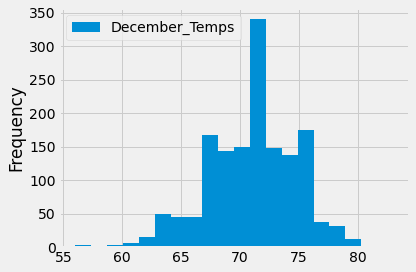

In [68]:
december = pd.DataFrame(dec_temp_df, columns=['December_Temps'])
december.head()

december.plot.hist(bins=20)
# Compress x-axis
plt.tight_layout()